In [2]:
print("All ok.....")

All ok.....


In [3]:
import os
import json

### Extracting Conversation from All_Conversations folder

In [4]:
import os

directory = "All_Conversations"

conversations = {}
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        with open(os.path.join(directory, filename), 'r') as file:
            conversations[filename] = json.load(file)

In [5]:
conversations['2db2965e-54fa-41fa-823b-ed79b943f0b1.json']

[{'speaker': 'Agent',
  'text': 'Hello, this is Emma from XYZ Collections, how are you today?',
  'stime': 0,
  'etime': 7},
 {'speaker': 'Customer',
  'text': "I'm fine, but I really don't have time for this right now.",
  'stime': 7.5,
  'etime': 12},
 {'speaker': 'Agent',
  'text': "I understand, I'll be brief. I'm calling about your overdue account with XYZ Bank.",
  'stime': 10,
  'etime': 19},
 {'speaker': 'Customer',
  'text': "Look, I've told you before, I want my number on the do not call list.",
  'stime': 18,
  'etime': 23},
 {'speaker': 'Agent',
  'text': 'I apologize for that. I will ensure your number is added to the do not call list right away.',
  'stime': 22,
  'etime': 30},
 {'speaker': 'Customer',
  'text': "Thank you, that's what I've been asking for.",
  'stime': 29,
  'etime': 33},
 {'speaker': 'Agent',
  'text': "You're welcome! Your request has been processed, and you won't receive further calls.",
  'stime': 32,
  'etime': 42},
 {'speaker': 'Customer',
  'text'

### Now conversations will contain all the data we need for further analysis.


### List of profane words (Source -> Google)

In [6]:
profane_words = [
    "arse", "arsehead", "arsehole", "ass", "ass hole", "asshole", 
    "bastard", "bitch", "bloody", "bollocks", "brotherfucker", "bugger", 
    "bullshit", "child-fucker", "Christ on a bike", "Christ on a cracker", 
    "cock", "cocksucker", "crap", "cunt", "dammit", "damn", "damned", 
    "damn it", "dick", "dick-head", "dickhead", "dumb ass", "dumb-ass", 
    "dumbass", "dyke", "faggot", "father-fucker", "fatherfucker", "fuck", 
    "fucker", "fucking", "god dammit", "goddammit", "God damn", "god damn", 
    "goddamn", "Goddamn", "goddamned", "goddamnit", "godsdamn", "hell", 
    "holy shit", "horseshit", "in shit", "jackarse", "jack-ass", "jackass", 
    "Jesus Christ", "Jesus fuck", "Jesus Harold Christ", "Jesus H. Christ", 
    "Jesus, Mary and Joseph", "Jesus wept", "kike", "mother fucker", 
    "mother-fucker", "motherfucker", "nigga", "nigra", "pigfucker", "piss", 
    "prick", "pussy", "shit", "shit ass", "shite", "sibling fucker", 
    "sisterfuck", "sisterfucker", "slut", "son of a bitch", "son of a whore", 
    "spastic", "sweet Jesus", "twat", "wanker"
]

# Question-1. Profanity Detection

### a. Identify all the call ids where collection agents have used profane language.
### b. Identify all the call ids where borrowers have used profane language.

## ->  Using Regex

In [7]:
import re
profane_calls_re = {"Agent": [], "Customer": []}
def detect_profanity(conversations, profane_words):
    for call_id, conversation in conversations.items(): # Looping in conversations
        for entry in conversation:
            speaker = entry['speaker']
            text = entry['text']

            if any(re.search(rf"\b{word}\b", text, re.IGNORECASE) for word in profane_words): # Checking for profane in profane_words
                if speaker == 'Agent': # If Agent use bad words then appending call_id in Agent
                    profane_calls_re["Agent"].append(call_id)
                elif speaker == 'Customer': # Else in Customer
                    profane_calls_re["Customer"].append(call_id)
    
    return profane_calls_re

profane_calls_re = detect_profanity(conversations, profane_words)

In [8]:
# Removing Duplicate Call IDs
profane_calls_re["Agent"] = list(set(profane_calls_re["Agent"]))
profane_calls_re["Customer"] = list(set(profane_calls_re["Customer"]))

print("Calls with profane words by Agent:", profane_calls_re["Agent"])
print(len(profane_calls_re["Agent"]))
print("Calls with profane words by Customer:", profane_calls_re["Customer"])
print(len(profane_calls_re["Customer"]))


Calls with profane words by Agent: ['e0a8f9d2-92d6-4093-bb97-82182c6e850f.json', '5e231fa2-03d8-4e70-9918-da45193472a9.json', '29489f77-b8e0-462c-9286-9216d59890f1.json', '966d60ed-9111-4e44-876d-6fcc3d78773e.json', '214c92cc-3141-404d-8224-c1b05acc345c.json', '928acb70-fa80-4532-a0c0-2234bf236e17.json', 'bf973b43-76ec-41a6-af68-a3b4bc4b69b3.json', '2f279983-ea96-4c10-a09d-4b607de21a38.json', '9a6cb7d2-c697-43a0-8cad-4194dfb44c92.json', '9505f0e7-5404-4f50-a497-35a9e899197c.json', '89d28c5a-f0da-41e9-a93e-0a749c20189c.json', 'c67274cc-d920-467a-80cc-476c9dd280d4.json', '87e28dae-2c70-4122-9452-6ec82164fab2.json', '23091fb3-8e07-4d4c-8575-227e3467e73a.json', '52ddb4a0-0599-4e18-a961-ac4b67da8d5e.json', '50abe040-847c-47e1-962f-a00d7ff2cfe4.json', 'f5f05257-aaa0-4194-b84c-36339c4e0659.json', '04bec80f-8614-484b-8ba2-831ff9dd03ef.json', '4f05aaff-585f-485f-90a1-60d027ec6e46.json']
19
Calls with profane words by Customer: ['8598c6d9-a767-4120-af0a-5490357c72f3.json', 'b155951b-086d-4f20-8f

## ->  Using Machine learning approach (LLM)

#### initializing huggingface fine-tuned model 

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_name = "unitary/toxic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/opt/anaconda3/envs/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [11]:
classifier("I Hate you") # Testing the model (Only predict toxic or not and its percentage)

[{'label': 'toxic', 'score': 0.9509985446929932}]

In [12]:
def detect_profanity_hf(text):
    result=classifier(text)
    if result[0]['score'] >= 0.5:
        return "profane"
    else:
        return "non-profane"

#### detect_profanity_in_conversations_hf will take around 1-2 min for final result

In [13]:
profane_calls_LLM = {"Agent": [], "Customer": []}
def detect_profanity_in_conversations_hf(conversations):
    for call_id, conversation in conversations.items():  # Looping in conversations
        for entry in conversation:
            speaker = entry['speaker']
            text = entry['text']

            result = detect_profanity_hf(text)
            
            if result == "profane": # Checking for profane in profane_words
                if speaker == 'Agent': # If Agent use bad words then appending call_id in Agent
                    profane_calls_LLM["Agent"].append(call_id) 
                elif speaker == 'Customer': # Else in Customer
                    profane_calls_LLM["Customer"].append(call_id)
    
    return profane_calls_LLM

profane_calls_LLM = detect_profanity_in_conversations_hf(conversations)


In [14]:
# Removing Duplicate Call IDs
profane_calls_LLM["Agent"] = list(set(profane_calls_LLM["Agent"]))
profane_calls_LLM["Customer"] = list(set(profane_calls_LLM["Customer"]))

print("Calls with profane words by Agent:", profane_calls_LLM["Agent"])
print(len(profane_calls_LLM["Agent"]))
print("Calls with profane words by Customer:", profane_calls_LLM["Customer"])
print(len(profane_calls_LLM["Customer"]))


Calls with profane words by Agent: ['928acb70-fa80-4532-a0c0-2234bf236e17.json', 'bf973b43-76ec-41a6-af68-a3b4bc4b69b3.json', '50abe040-847c-47e1-962f-a00d7ff2cfe4.json', '2f279983-ea96-4c10-a09d-4b607de21a38.json', '966d60ed-9111-4e44-876d-6fcc3d78773e.json', 'e0a8f9d2-92d6-4093-bb97-82182c6e850f.json', 'f5f05257-aaa0-4194-b84c-36339c4e0659.json', '9a6cb7d2-c697-43a0-8cad-4194dfb44c92.json', '5e231fa2-03d8-4e70-9918-da45193472a9.json', '9505f0e7-5404-4f50-a497-35a9e899197c.json', '89d28c5a-f0da-41e9-a93e-0a749c20189c.json', '29489f77-b8e0-462c-9286-9216d59890f1.json', 'c67274cc-d920-467a-80cc-476c9dd280d4.json', '04bec80f-8614-484b-8ba2-831ff9dd03ef.json', '214c92cc-3141-404d-8224-c1b05acc345c.json', '4f05aaff-585f-485f-90a1-60d027ec6e46.json', '87e28dae-2c70-4122-9452-6ec82164fab2.json', '23091fb3-8e07-4d4c-8575-227e3467e73a.json']
18
Calls with profane words by Customer: ['8598c6d9-a767-4120-af0a-5490357c72f3.json', 'b155951b-086d-4f20-8fb5-de3e42253ce6.json', '708878fa-108e-4c22-b7

## -> Comparative Analysis (Question 1)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Combining Agent and Customer call IDs for overall analysis
regex_combined_set = set(profane_calls_re["Agent"]).union(set(profane_calls_re["Customer"]))
llm_combined_set = set(profane_calls_LLM["Agent"]).union(set(profane_calls_LLM["Customer"]))

# Assume LLM is correct (evaluate Regex against LLM)
TP_regex_vs_llm = len(regex_combined_set.intersection(llm_combined_set))  # True positives
FP_regex_vs_llm = len(regex_combined_set.difference(llm_combined_set))   # False positives
FN_regex_vs_llm = len(llm_combined_set.difference(regex_combined_set))   # False negatives

precision_regex_vs_llm = TP_regex_vs_llm / (TP_regex_vs_llm + FP_regex_vs_llm) if (TP_regex_vs_llm + FP_regex_vs_llm) > 0 else 0
recall_regex_vs_llm = TP_regex_vs_llm / (TP_regex_vs_llm + FN_regex_vs_llm) if (TP_regex_vs_llm + FN_regex_vs_llm) > 0 else 0
f1_regex_vs_llm = 2 * (precision_regex_vs_llm * recall_regex_vs_llm) / (precision_regex_vs_llm + recall_regex_vs_llm) if (precision_regex_vs_llm + recall_regex_vs_llm) > 0 else 0

# Assume Regex is correct (evaluate LLM against Regex)
TP_llm_vs_regex = len(llm_combined_set.intersection(regex_combined_set))  # True positives
FP_llm_vs_regex = len(llm_combined_set.difference(regex_combined_set))   # False positives
FN_llm_vs_regex = len(regex_combined_set.difference(llm_combined_set))   # False negatives

precision_llm_vs_regex = TP_llm_vs_regex / (TP_llm_vs_regex + FP_llm_vs_regex) if (TP_llm_vs_regex + FP_llm_vs_regex) > 0 else 0
recall_llm_vs_regex = TP_llm_vs_regex / (TP_llm_vs_regex + FN_llm_vs_regex) if (TP_llm_vs_regex + FN_llm_vs_regex) > 0 else 0
f1_llm_vs_regex = 2 * (precision_llm_vs_regex * recall_llm_vs_regex) / (precision_llm_vs_regex + recall_llm_vs_regex) if (precision_llm_vs_regex + recall_llm_vs_regex) > 0 else 0

# Print metrics for both assumptions
print("Evaluation when assuming LLM is correct:")
print(f"True Positives: {TP_regex_vs_llm}")
print(f"False Positives (Regex): {FP_regex_vs_llm}")
print(f"False Negatives (Regex): {FN_regex_vs_llm}")
print(f"Precision (Regex): {precision_regex_vs_llm:.4f}")
print(f"Recall (Regex): {recall_regex_vs_llm:.4f}")
print(f"F1-Score (Regex): {f1_regex_vs_llm:.4f}")

print("\nEvaluation when assuming Regex is correct:")
print(f"True Positives: {TP_llm_vs_regex}")
print(f"False Positives (LLM): {FP_llm_vs_regex}")
print(f"False Negatives (LLM): {FN_llm_vs_regex}")
print(f"Precision (LLM): {precision_llm_vs_regex:.4f}")
print(f"Recall (LLM): {recall_llm_vs_regex:.4f}")
print(f"F1-Score (LLM): {f1_llm_vs_regex:.4f}")

# Determine the better approach based on the results
if f1_regex_vs_llm > f1_llm_vs_regex:
    print("\nBased on the evaluation, the Regex approach performs better.")
elif f1_regex_vs_llm < f1_llm_vs_regex:
    print("\nBased on the evaluation, the LLM approach performs better.")
else:
    print("\nBoth approaches perform equally well based on the evaluation.")


Evaluation when assuming LLM is correct:
True Positives: 38
False Positives (Regex): 1
False Negatives (Regex): 0
Precision (Regex): 0.9744
Recall (Regex): 1.0000
F1-Score (Regex): 0.9870

Evaluation when assuming Regex is correct:
True Positives: 38
False Positives (LLM): 0
False Negatives (LLM): 1
Precision (LLM): 1.0000
Recall (LLM): 0.9744
F1-Score (LLM): 0.9870

Both approaches perform equally well based on the evaluation.


# Question-2. Privacy and Compliance Analysis

### a. Identify all the call ids where agents have shared sensitive information (balance or account details) without the identity verification(i.e. without verification of date of birth or address or Social Security Number).

## -> Using Regex

In [16]:
import re

# Define regex patterns
sensitive_pattern = re.compile(r"\b(balance|amount owed|total due|payment|account number|credit card)\b", re.IGNORECASE)
verification_pattern = re.compile(r"\b(date of birth|DOB|address|street|zip code|SSN|social security number)\b", re.IGNORECASE)

violating_call_ids_regex = []

for call_id, conversation in conversations.items():
    agent_statements = [utt["text"] for utt in conversation if utt["speaker"] == "Agent"]
    verified = False
    violation = False

    for statement in agent_statements:
        if verification_pattern.search(statement):
            verified = True  # Found verification keyword
        if sensitive_pattern.search(statement) and not verified:
            violation = True  # Found sensitive information without prior verification
            break
    
    if violation:
        violating_call_ids_regex.append(call_id)

print("Call IDs with sensitive information violations:", violating_call_ids_regex)


Call IDs with sensitive information violations: ['19169ec6-213f-48e9-8ec2-c24ee2e6eb20.json', '80e5fe02-ec03-4ca5-902a-fdf38e6b7b8a.json', 'acec9db1-1209-4f98-881e-6d413e1aba2d.json', 'd7bbea61-d739-43fb-a198-ced1b59f9491.json', '8372d771-4271-47b1-82e7-9cb3562fb380.json', '39c3e29c-7b7c-43d2-999b-eb473ec31de3.json', '60e92cb0-536d-4b03-b778-81dcbef4ea0e.json', '38231782-a07c-4fbb-a036-723dfdfede1e.json', '00be25b0-458f-4cbf-ae86-ae2ec1f7fba4.json', '40b40ec2-8ce2-47a8-b9d4-621285d7b484.json', 'dbd3e2fd-4a8f-4eb3-aa6f-befcc150bfd8.json', '1190bab7-d82f-4259-bb55-9617dff7da07.json', 'ddaea5f2-20b8-439a-a0be-ac92bb606e7a.json', '9e936113-46a1-4d70-9cc5-876b1c801602.json', 'ecf48f31-9a97-4042-bd79-0c24e6ecb4af.json', '708e7950-1be4-47a7-9c82-e03c88f5a1d0.json', '742147aa-a2df-4429-859e-05b4a7875563.json', 'ee078707-82d8-4937-942a-0d1dce58dac5.json', 'b6eb2096-6102-431d-b0df-4a87310d46c4.json', '5c0bf9ad-669f-4a26-8c08-4af6f9698cf0.json', 'bf973b43-76ec-41a6-af68-a3b4bc4b69b3.json', '87925

## -> Using LLM (Cerebras API for fast inferencing)

In [17]:
from langchain_cerebras import ChatCerebras
cerebras_llm = ChatCerebras(model="llama-3.3-70b", api_key="csk-v3e6jjknn2pmvk5t2mx5jncyxvj6d32he6phyxcj886vrcte")
def check_compliance_with_cerebras(conversation):
    # Define the prompt for the analysis
    prompt = f"""
You are a compliance auditor. Analyze the following conversation between an Agent and a Customer to determine if the Agent shared sensitive information (like outstanding balance amount , account number, or credit card details) **without first verifying the Customer's identity**. return "Violation" if the Agent violated the compliance policy, and "Good" if the Agent followed the correct procedure.

The following checks must be strictly applied:
1. Identity verification must include confirmation of at least one of the following:
- Date of birth (DOB)
- Address
- Social Security Number (SSN)
2. If the Agent provides sensitive information without any of these verifications, return "Violation".
3. If the Agent performs verification before sharing sensitive information, return "Good".
4. Do not include any explanation, comments, or additional text. Only return "Violation" or "Good".

Conversation:
{conversation}

Strict Evaluation:
"""

    # Send the prompt to the Cerebras model
    response = cerebras_llm.invoke(prompt)
    return response

In [18]:
# Example usage on conversations
violating_call_ids = []
for call_id, conversation in conversations.items():
    # Combine conversation into a single string
    result = check_compliance_with_cerebras(conversation)
    result = result.content
    if "Violation" in result:
        violating_call_ids.append(call_id)

print("Call IDs with sensitive information violations:", violating_call_ids)


Call IDs with sensitive information violations: ['19169ec6-213f-48e9-8ec2-c24ee2e6eb20.json', '80e5fe02-ec03-4ca5-902a-fdf38e6b7b8a.json', 'acec9db1-1209-4f98-881e-6d413e1aba2d.json', 'd7bbea61-d739-43fb-a198-ced1b59f9491.json', '8372d771-4271-47b1-82e7-9cb3562fb380.json', '60e92cb0-536d-4b03-b778-81dcbef4ea0e.json', 'd071bb49-40f8-4bae-8c6d-cfc0d4a011d5.json', '38231782-a07c-4fbb-a036-723dfdfede1e.json', '00be25b0-458f-4cbf-ae86-ae2ec1f7fba4.json', '40b40ec2-8ce2-47a8-b9d4-621285d7b484.json', 'f152d094-a169-4486-b9af-a66a7716a608.json', 'dbd3e2fd-4a8f-4eb3-aa6f-befcc150bfd8.json', '1190bab7-d82f-4259-bb55-9617dff7da07.json', 'ddaea5f2-20b8-439a-a0be-ac92bb606e7a.json', 'b70866a2-2f46-4784-992b-74d6dc60806e.json', '9e936113-46a1-4d70-9cc5-876b1c801602.json', 'ecf48f31-9a97-4042-bd79-0c24e6ecb4af.json', '708e7950-1be4-47a7-9c82-e03c88f5a1d0.json', 'a73d777f-368a-46b5-9d59-0aa5829b4427.json', '742147aa-a2df-4429-859e-05b4a7875563.json', 'ee078707-82d8-4937-942a-0d1dce58dac5.json', 'b6eb2

- > Better but Time taking approach (around 8 min)

## -> Comparative Analysis (Question 2)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert the lists to sets for efficient operations
regex_set = set(violating_call_ids_regex)
llm_set = set(violating_call_ids)

# Assume LLM is correct (evaluate Regex against LLM)
TP_regex_vs_llm = len(regex_set.intersection(llm_set))  # True positives
FP_regex_vs_llm = len(regex_set.difference(llm_set))    # False positives
FN_regex_vs_llm = len(llm_set.difference(regex_set))    # False negatives

precision_regex_vs_llm = TP_regex_vs_llm / (TP_regex_vs_llm + FP_regex_vs_llm) if (TP_regex_vs_llm + FP_regex_vs_llm) > 0 else 0
recall_regex_vs_llm = TP_regex_vs_llm / (TP_regex_vs_llm + FN_regex_vs_llm) if (TP_regex_vs_llm + FN_regex_vs_llm) > 0 else 0
f1_regex_vs_llm = 2 * (precision_regex_vs_llm * recall_regex_vs_llm) / (precision_regex_vs_llm + recall_regex_vs_llm) if (precision_regex_vs_llm + recall_regex_vs_llm) > 0 else 0

# Assume Regex is correct (evaluate LLM against Regex)
TP_llm_vs_regex = len(llm_set.intersection(regex_set))  # True positives
FP_llm_vs_regex = len(llm_set.difference(regex_set))    # False positives
FN_llm_vs_regex = len(regex_set.difference(llm_set))    # False negatives

precision_llm_vs_regex = TP_llm_vs_regex / (TP_llm_vs_regex + FP_llm_vs_regex) if (TP_llm_vs_regex + FP_llm_vs_regex) > 0 else 0
recall_llm_vs_regex = TP_llm_vs_regex / (TP_llm_vs_regex + FN_llm_vs_regex) if (TP_llm_vs_regex + FN_llm_vs_regex) > 0 else 0
f1_llm_vs_regex = 2 * (precision_llm_vs_regex * recall_llm_vs_regex) / (precision_llm_vs_regex + recall_llm_vs_regex) if (precision_llm_vs_regex + recall_llm_vs_regex) > 0 else 0

# Print metrics for both assumptions
print("Evaluation when assuming LLM is correct:")
print(f"True Positives: {TP_regex_vs_llm}")
print(f"False Positives (Regex): {FP_regex_vs_llm}")
print(f"False Negatives (Regex): {FN_regex_vs_llm}")
print(f"Precision (Regex): {precision_regex_vs_llm:.4f}")
print(f"Recall (Regex): {recall_regex_vs_llm:.4f}")
print(f"F1-Score (Regex): {f1_regex_vs_llm:.4f}")

print("\nEvaluation when assuming Regex is correct:")
print(f"True Positives: {TP_llm_vs_regex}")
print(f"False Positives (LLM): {FP_llm_vs_regex}")
print(f"False Negatives (LLM): {FN_llm_vs_regex}")
print(f"Precision (LLM): {precision_llm_vs_regex:.4f}")
print(f"Recall (LLM): {recall_llm_vs_regex:.4f}")
print(f"F1-Score (LLM): {f1_llm_vs_regex:.4f}")

# Determine the better approach based on the results
if f1_regex_vs_llm > f1_llm_vs_regex:
    print("\nBased on the evaluation, the Regex approach performs better.")
elif f1_regex_vs_llm < f1_llm_vs_regex:
    print("\nBased on the evaluation, the LLM approach performs better.")
else:
    print("\nBoth approaches perform equally well based on the evaluation.")


Evaluation when assuming LLM is correct:
True Positives: 70
False Positives (Regex): 3
False Negatives (Regex): 11
Precision (Regex): 0.9589
Recall (Regex): 0.8642
F1-Score (Regex): 0.9091

Evaluation when assuming Regex is correct:
True Positives: 70
False Positives (LLM): 11
False Negatives (LLM): 3
Precision (LLM): 0.8642
Recall (LLM): 0.9589
F1-Score (LLM): 0.9091

Both approaches perform equally well based on the evaluation.


- > **Note** : LLM is better than Regex for detecting violations because it understands context and language nuances, which Regex can't handle well. While both might have similar F1-scores, LLM can adapt to complex conversations and catch mistakes Regex might miss. However, LLM is slower and needs more resources. So, for more accurate results, especially with complicated data, LLM is the best choice.

## Question-3: Visualization Requirements:

In [27]:
def calculate_silence_overtalk_percentage(conversation):
    if len(conversation) == 0:  # Checking if the conversation is empty
        return 0, 0  # Return 0% for both silence and overtalk if no conversation data 
    overtalk_duration = 0  
    silence_duration = 0 
    total_call_duration=conversation[-1]['etime']-conversation[0]['stime']  # Calculate total call duration
    overlap_case1=False
    overlap_case2=False
    overlap=''
    # Iterate through the conversation turns
    for i in range(len(conversation) - 1):
        curr_start = conversation[i]['stime']
        curr_end = conversation[i]['etime']
        next_start = conversation[i + 1]['stime']
        next_end = conversation[i + 1]['etime']
        
        # Checking for silence (gap between speakers)
        silence = next_start - curr_end
        if silence > 0:
            silence_duration += silence
        
        # Checking for overtalk (overlapping speech times)
        # case 1: partial overlap of speech
        if curr_end > next_start and curr_start < next_end:
            overlap_case1=True
            overtalk_duration += min(curr_end, next_end) - max(curr_start, next_start)
        # case 2: complete overlap of speech
        elif next_start >= curr_start and next_end <= curr_end:
            overlap_case2=True
            overtalk_duration += next_end - next_start

    # silence and overtalk percentages
    silence_percentage = (silence_duration / total_call_duration) * 100 if total_call_duration > 0 else 0
    overtalk_percentage = (overtalk_duration / total_call_duration) * 100 if total_call_duration > 0 else 0
    
    # Checking for overlap
    if overtalk_duration and overlap_case1 and overlap_case2:
        overlap = 'both types of overlap are present'
    elif overtalk_duration:
        overlap = 'any one type of overlap is present'  
        
    # Return the calculated percentages and other things
    return silence_percentage, overtalk_percentage,silence_duration,overtalk_duration,overlap

# Initialize lists to store results
call_metrics = []

# Iterate through each conversation in the 'conversations' dictionary
for call_id, conversation in conversations.items():
    if conversation:  # if conversation is not empty
        silence_percentage, overtalk_percentage,silence_duration,overtalk_duration,overlap = calculate_silence_overtalk_percentage(conversation)
        
        # Storing results for the current call
        call_metrics.append({
            "call_id": call_id,
            "silence_percentage": silence_percentage,
            "overtalk_percentage": overtalk_percentage,
            "silence_time": silence_duration,
            "overtalk_time": overtalk_duration,
            "total_call_duration": conversation[-1]['etime']-conversation[0]['stime'],
            "type_of_overlap":overlap
        })
    else:
        print(f"Warning: Conversation for {call_id} is empty.")

# Print the results
for metrics in call_metrics:
    print(f"Call ID: {metrics['call_id']}")
    print(f"Silence Percentage: {metrics['silence_percentage']:.2f}%")
    print(f"Overtalk Percentage: {metrics['overtalk_percentage']:.2f}%")
    print(f"Silence : {metrics['silence_time']}")
    print(f"Overtalk : {metrics['overtalk_time']}")
    print(f"total: {metrics['total_call_duration']}")
    print(f"type_of_overlap: {metrics['type_of_overlap']}")
    print("-" * 50)


Call ID: 2db2965e-54fa-41fa-823b-ed79b943f0b1.json
Silence Percentage: 1.00%
Overtalk Percentage: 16.00%
Silence : 0.5
Overtalk : 8
total: 50
type_of_overlap: any one type of overlap is present
--------------------------------------------------
Call ID: 8a9655a7-be88-4921-b0ad-04aa1b9953d1.json
Silence Percentage: 8.42%
Overtalk Percentage: 6.32%
Silence : 8
Overtalk : 6
total: 95
type_of_overlap: any one type of overlap is present
--------------------------------------------------
Call ID: 19169ec6-213f-48e9-8ec2-c24ee2e6eb20.json
Silence Percentage: 4.81%
Overtalk Percentage: 11.54%
Silence : 2.5
Overtalk : 6
total: 52
type_of_overlap: any one type of overlap is present
--------------------------------------------------
Call ID: c86714f0-3aeb-4628-8cfa-ee0a46839508.json
Silence Percentage: 8.24%
Overtalk Percentage: 9.41%
Silence : 7
Overtalk : 8
total: 85
type_of_overlap: any one type of overlap is present
--------------------------------------------------
Call ID: 0c8297aa-ced1-414

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


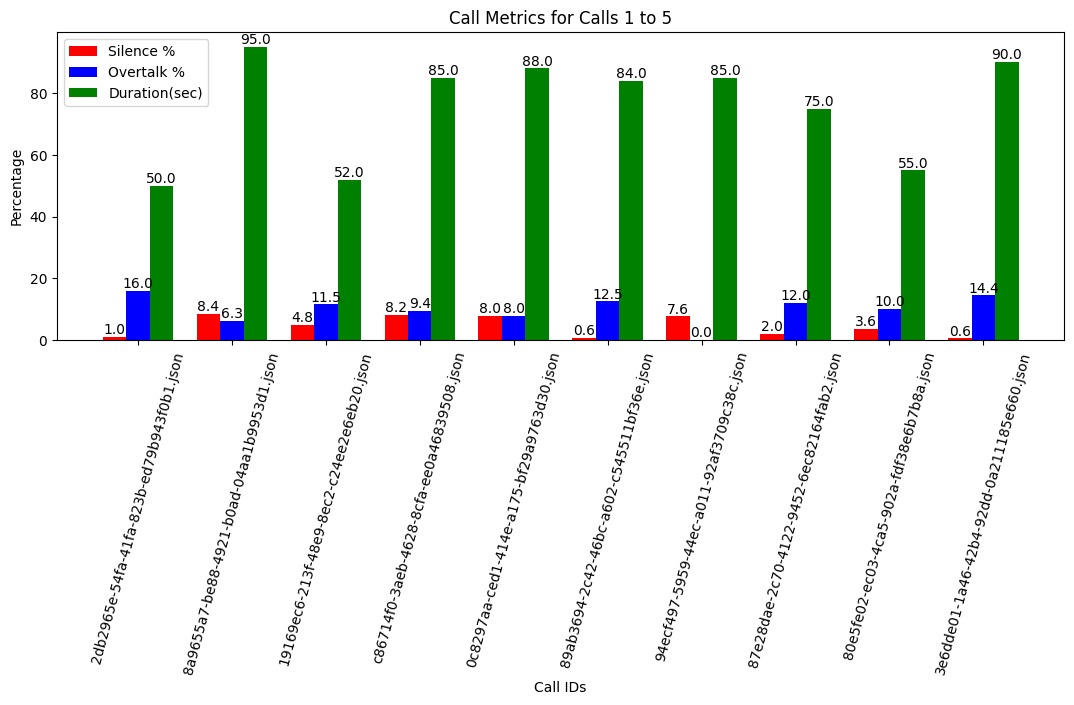

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


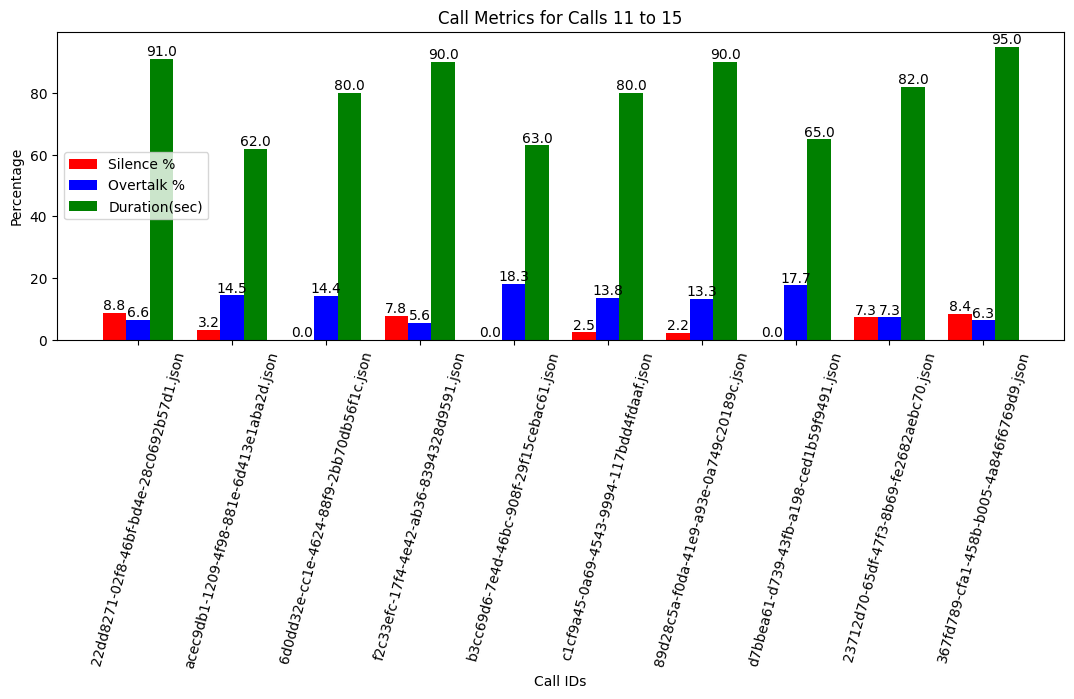

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


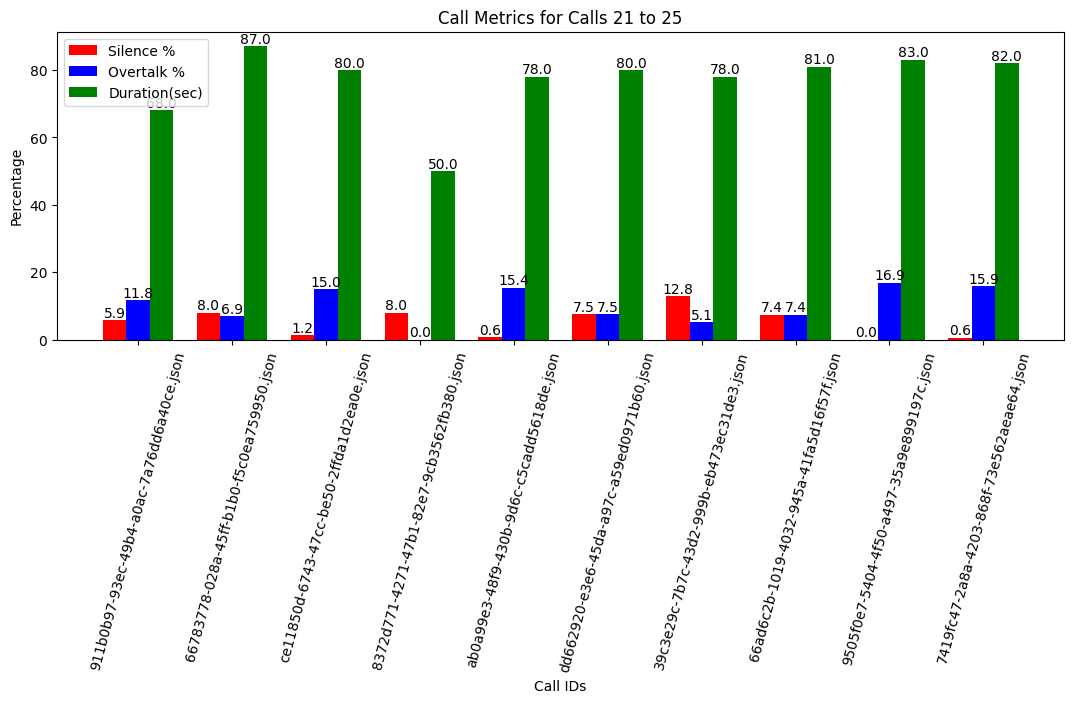

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


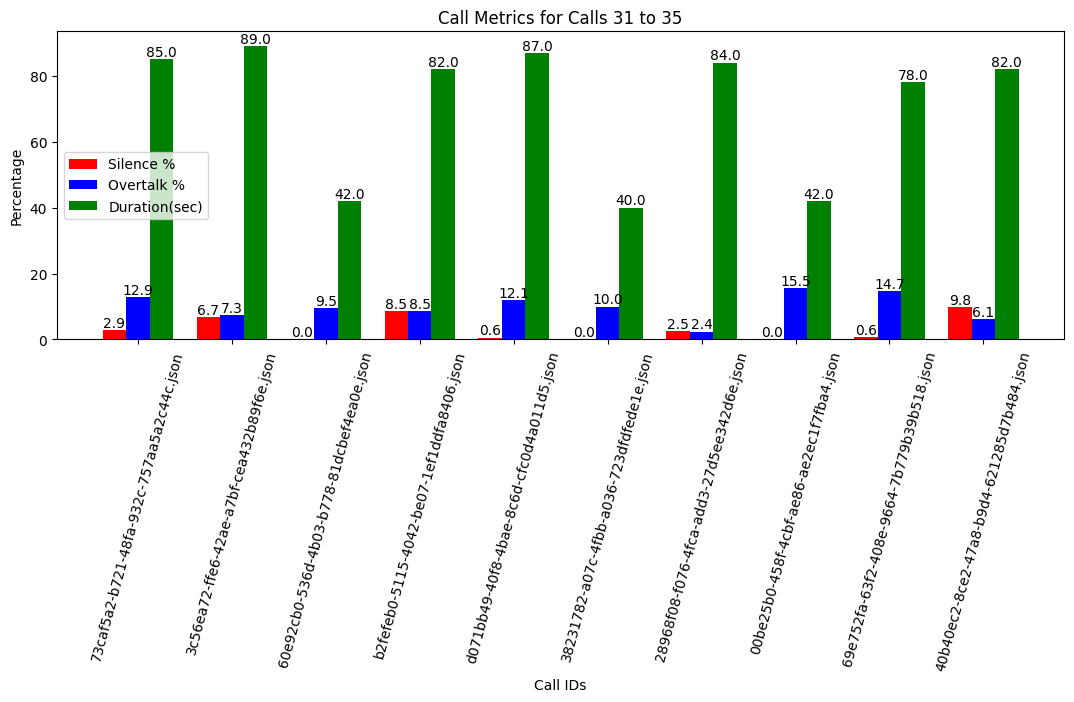

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


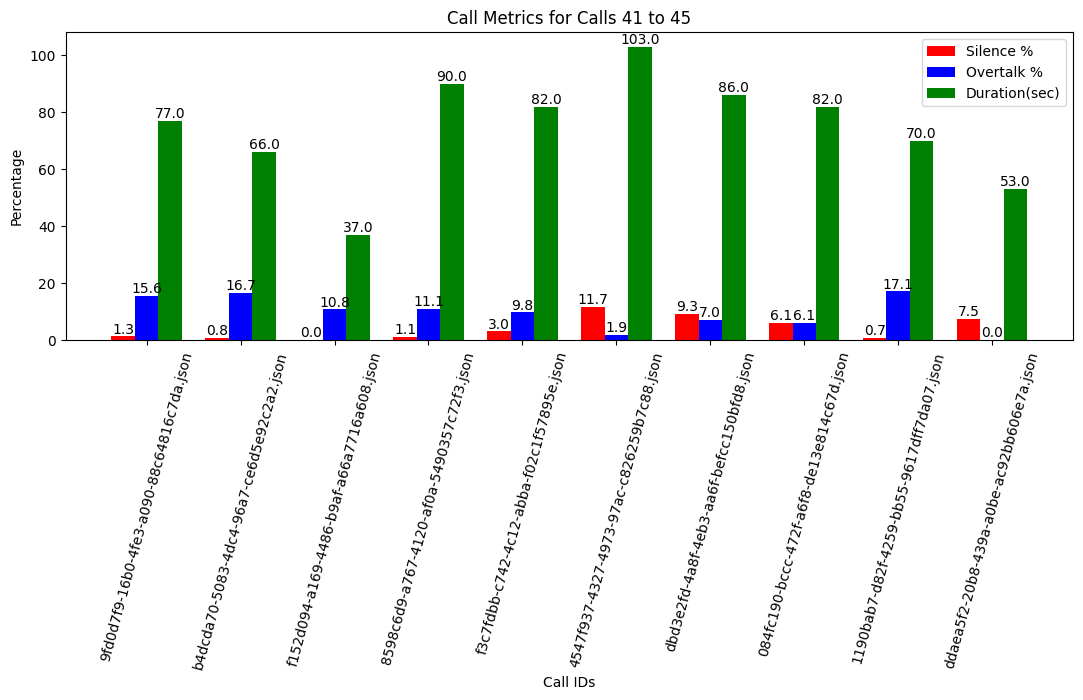

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


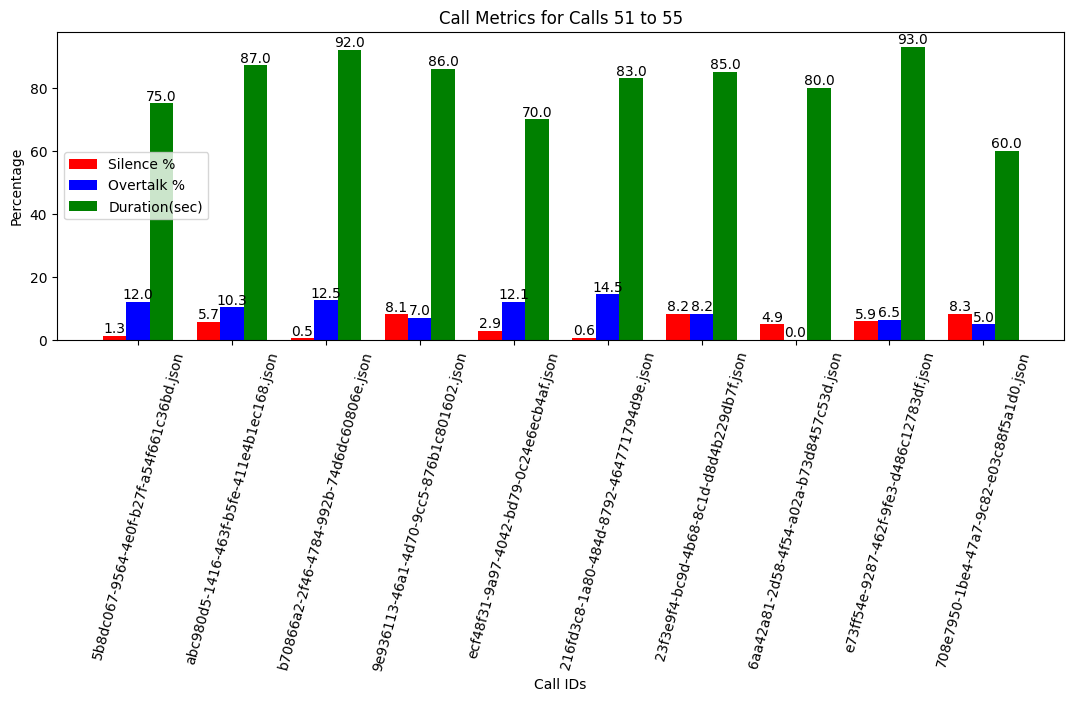

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


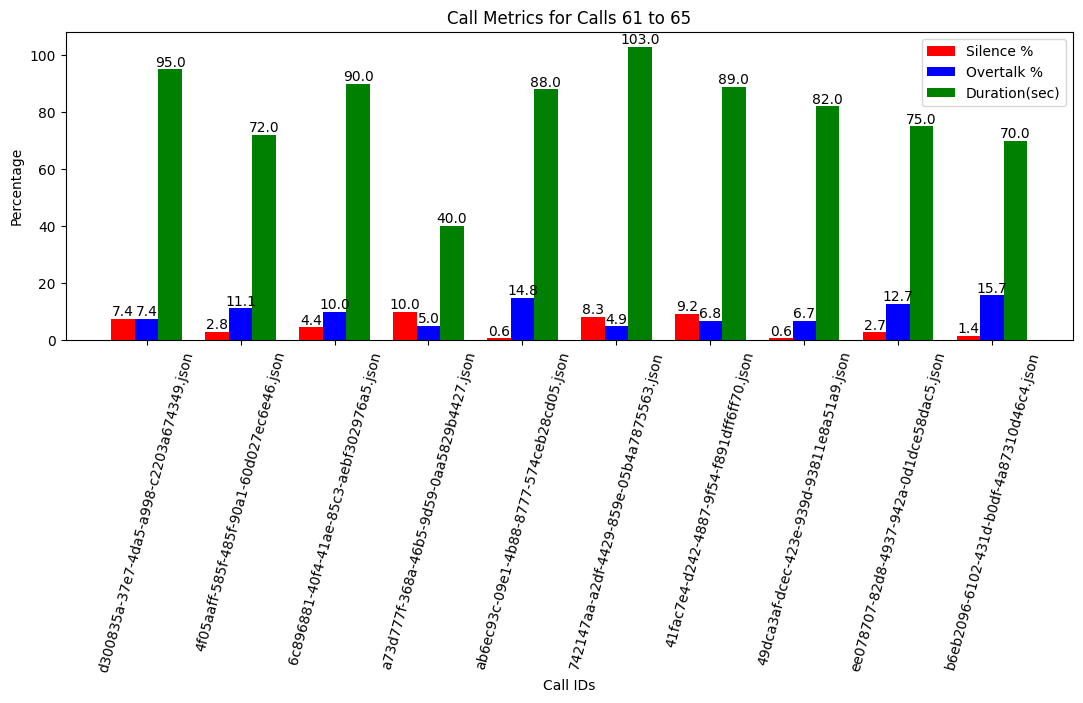

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


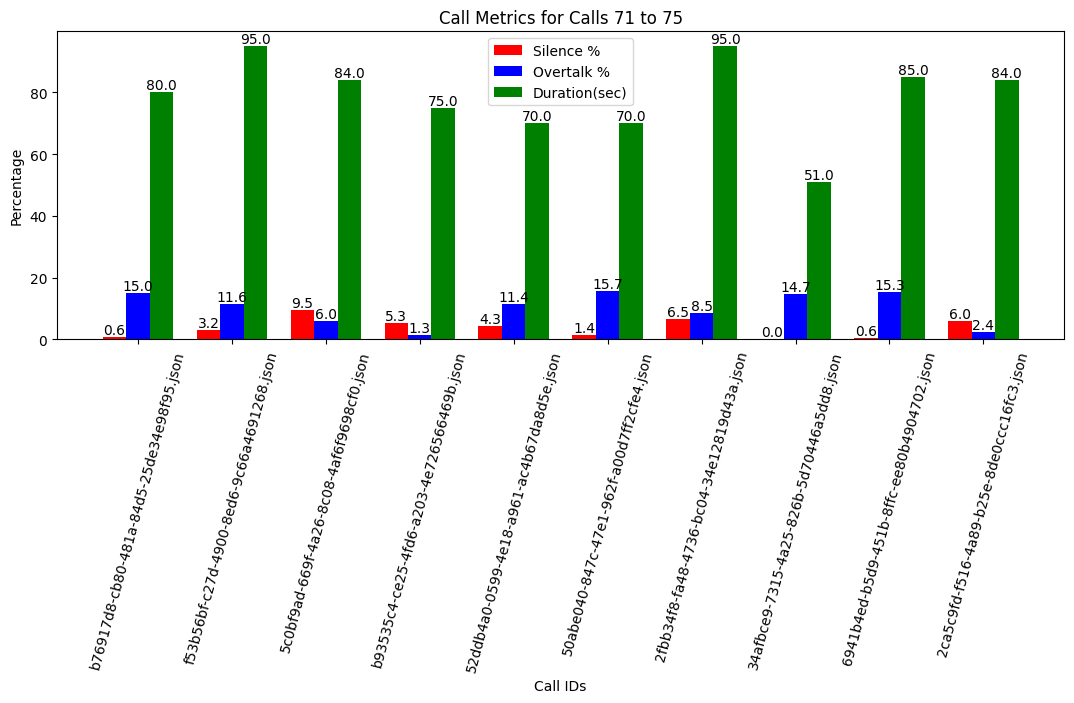

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


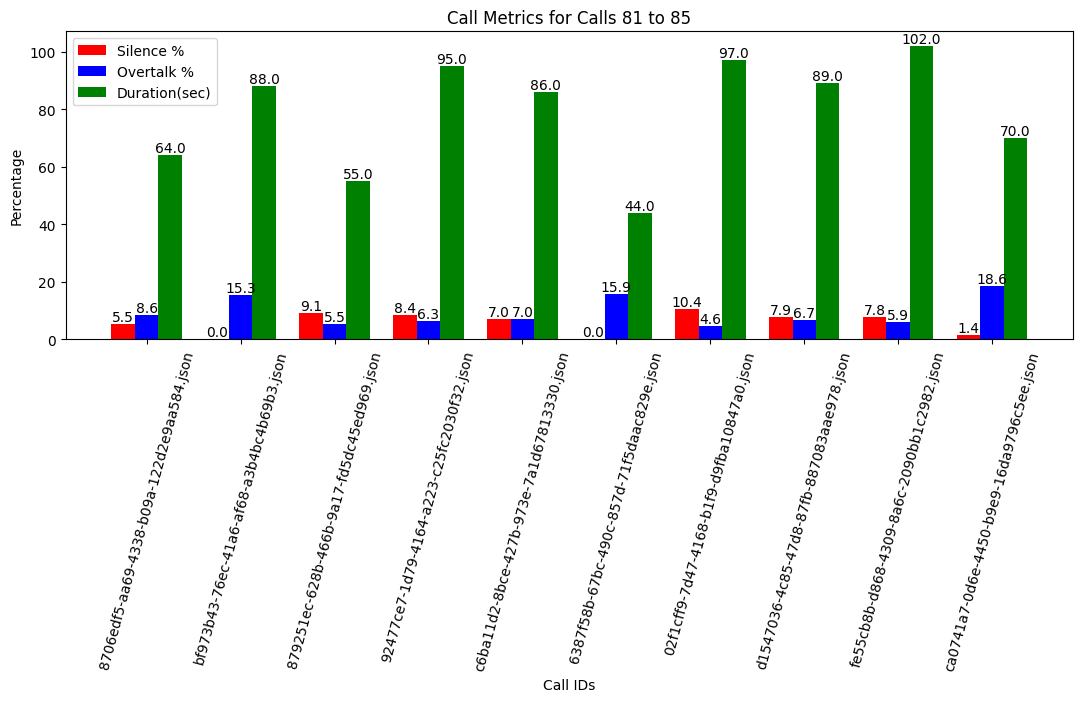

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


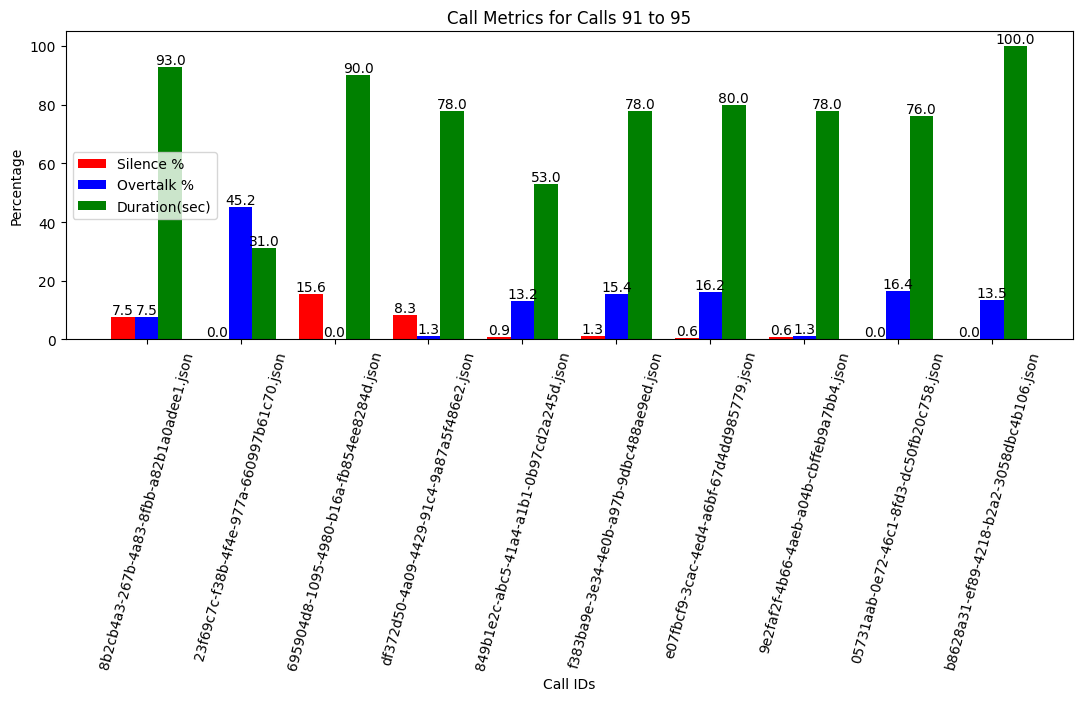

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


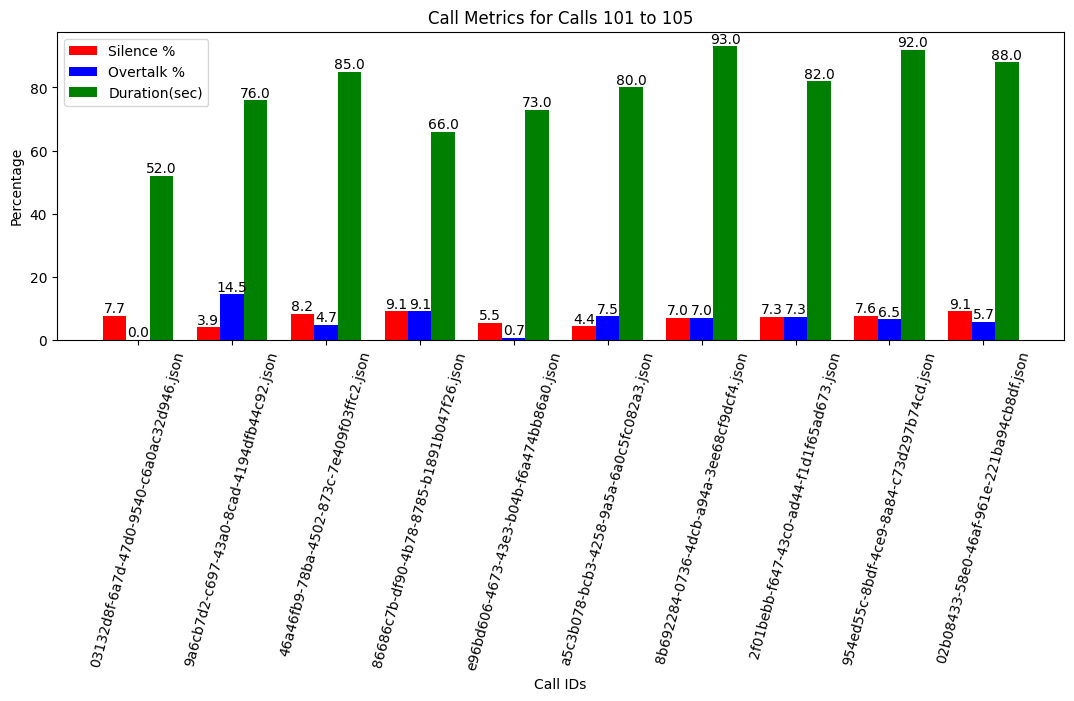

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


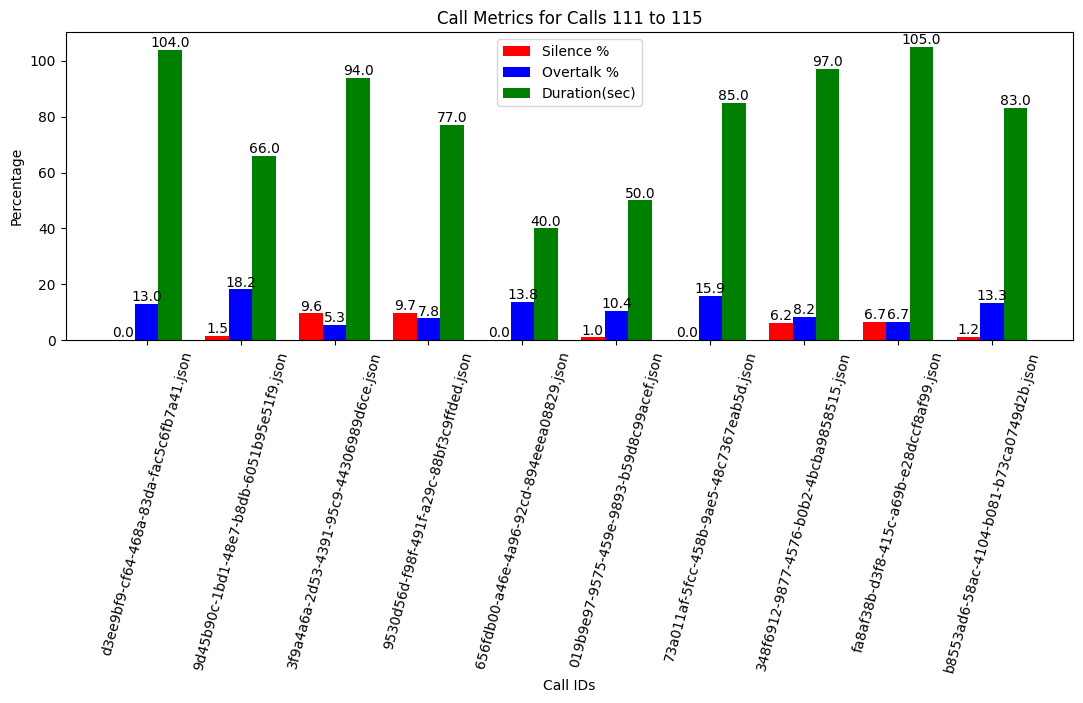

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


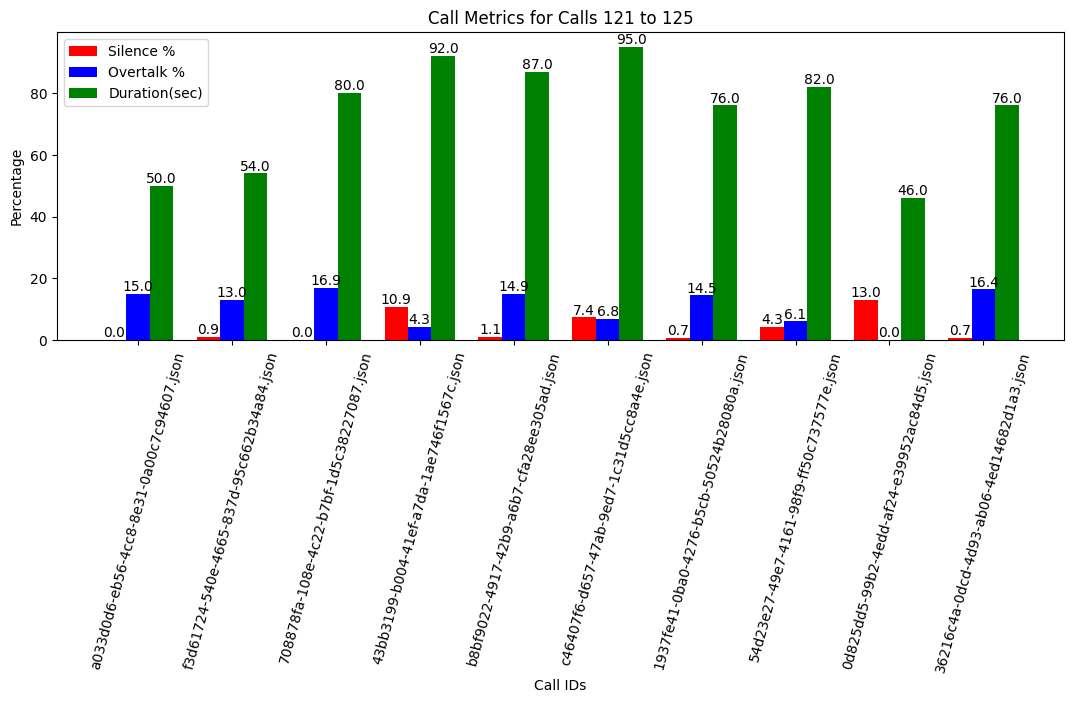

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


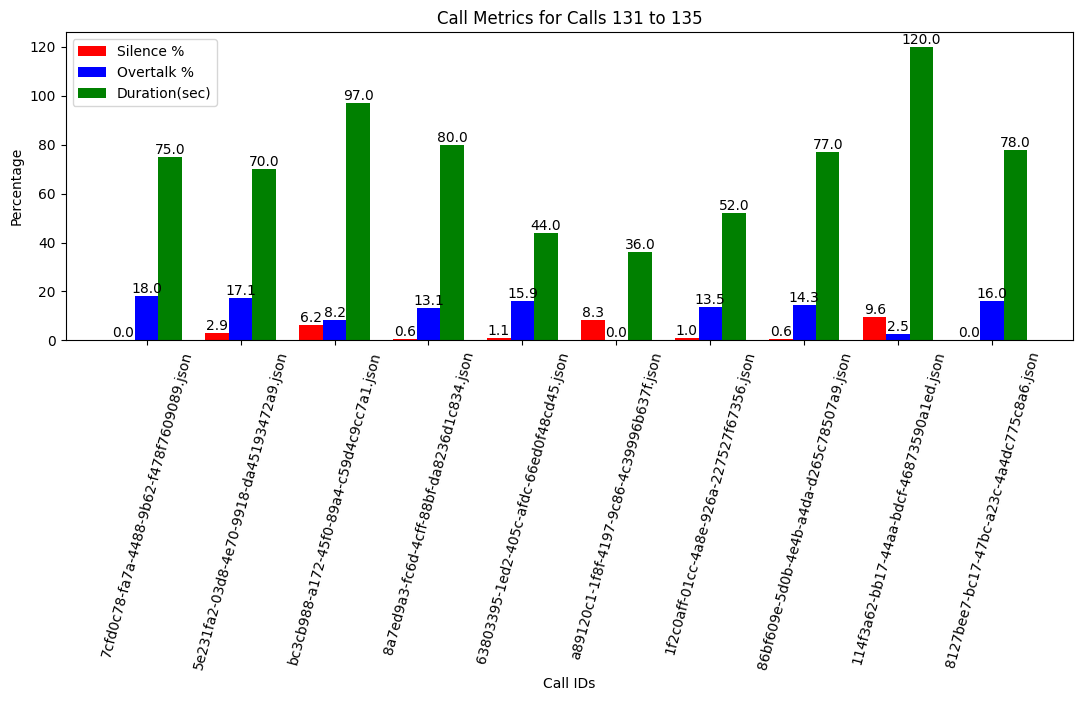

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


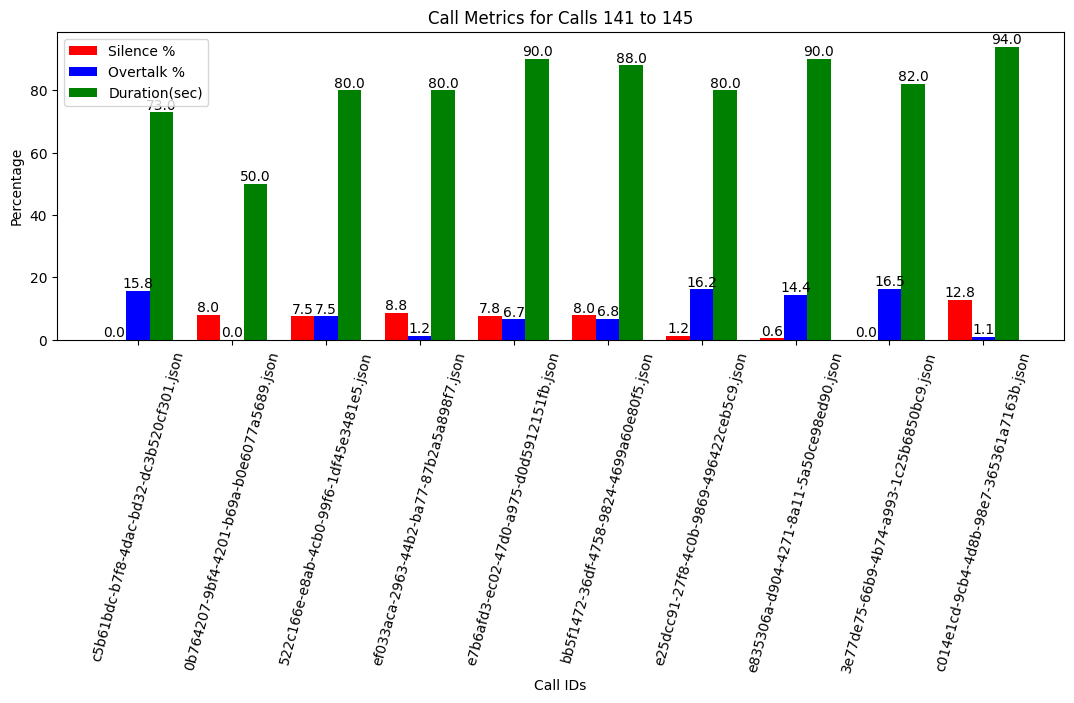

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


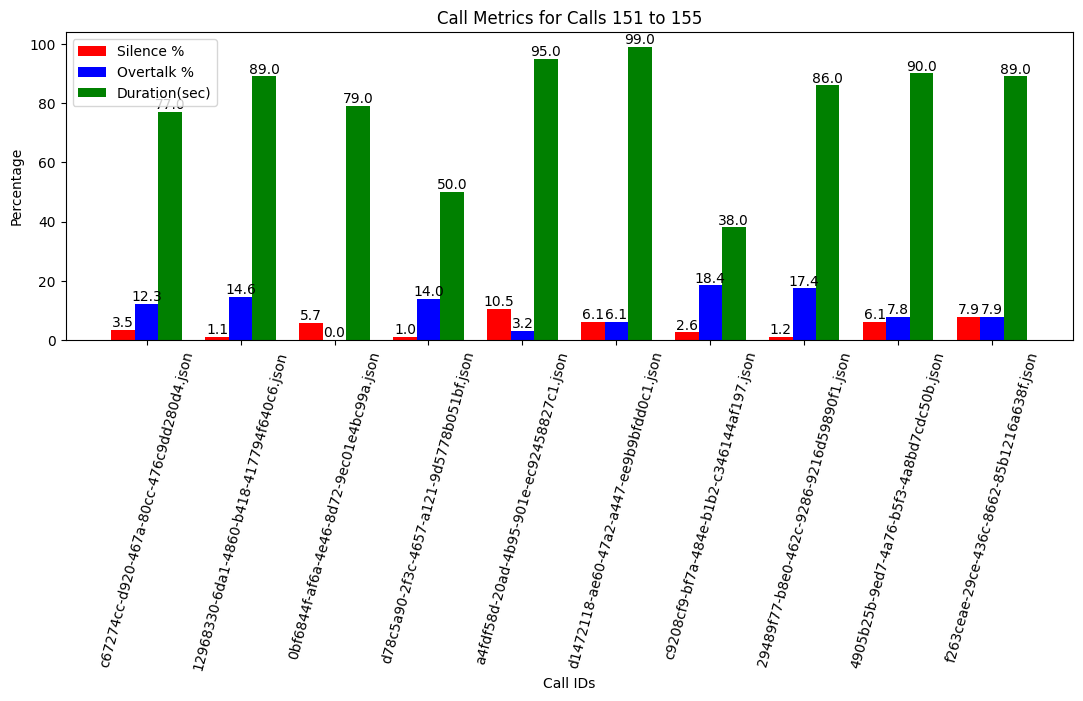

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


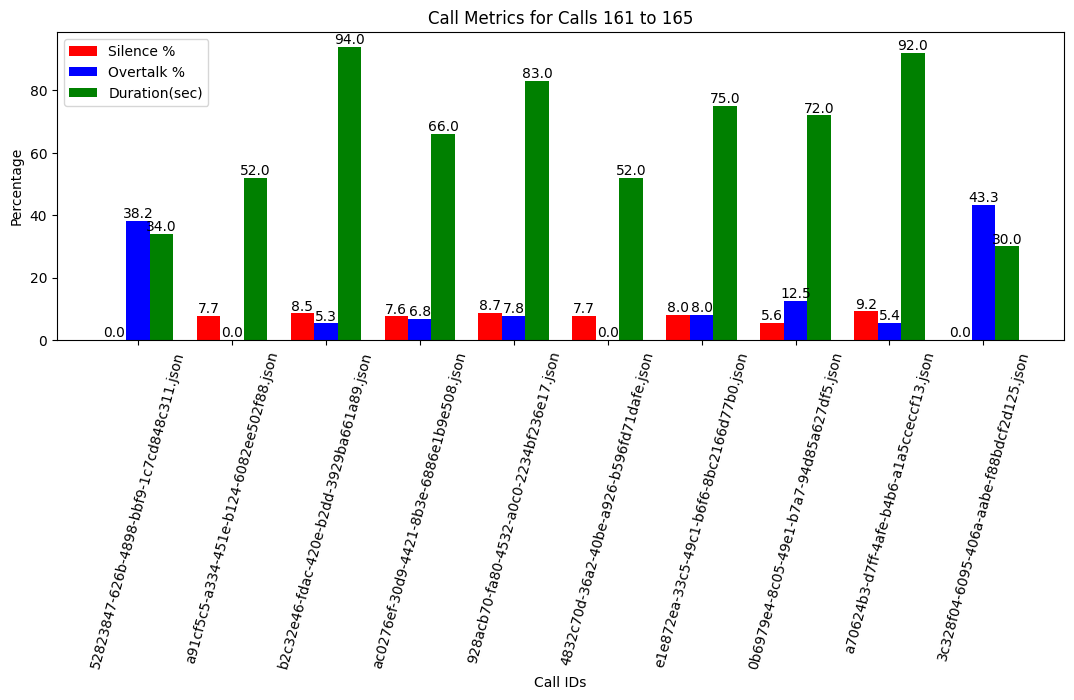

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


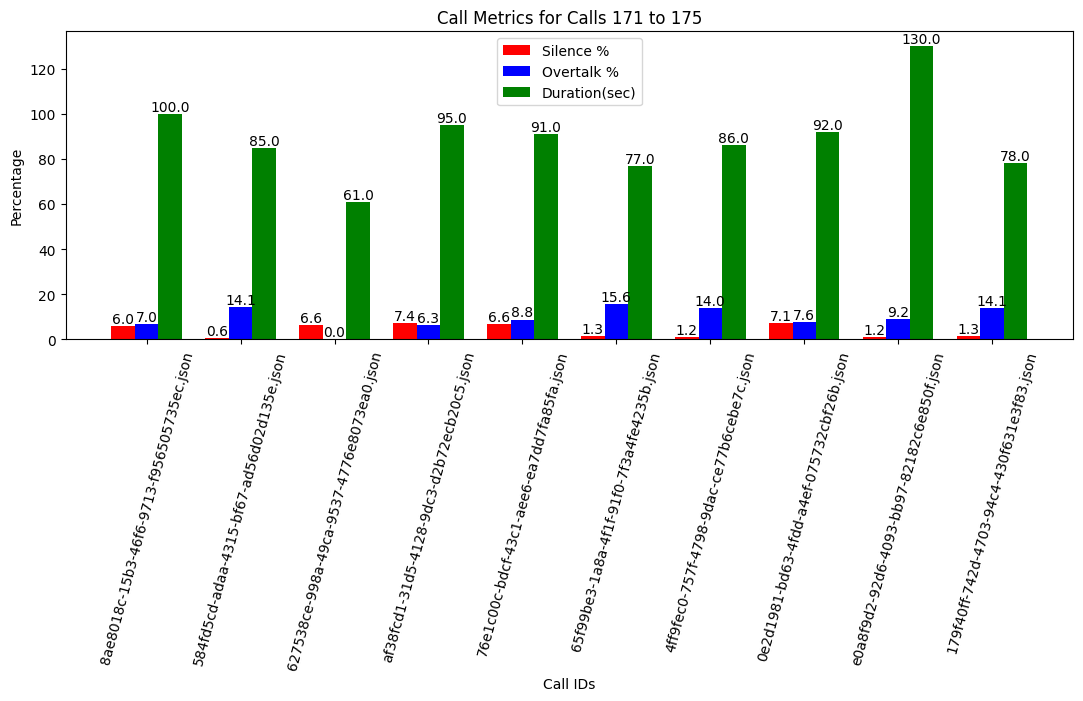

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


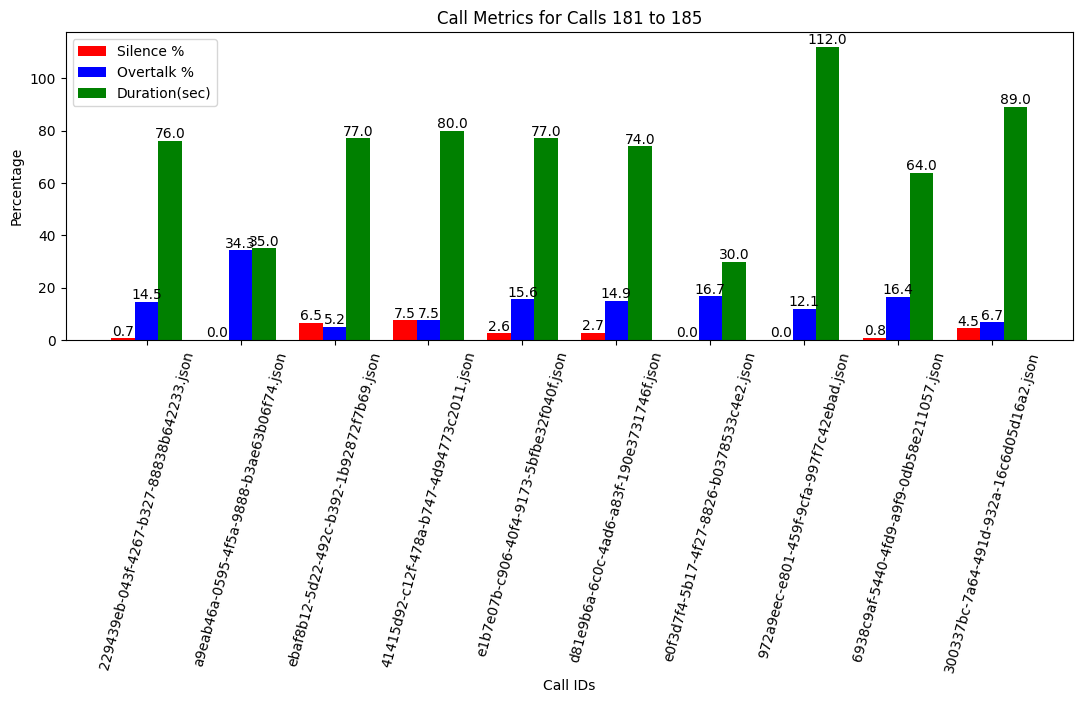

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


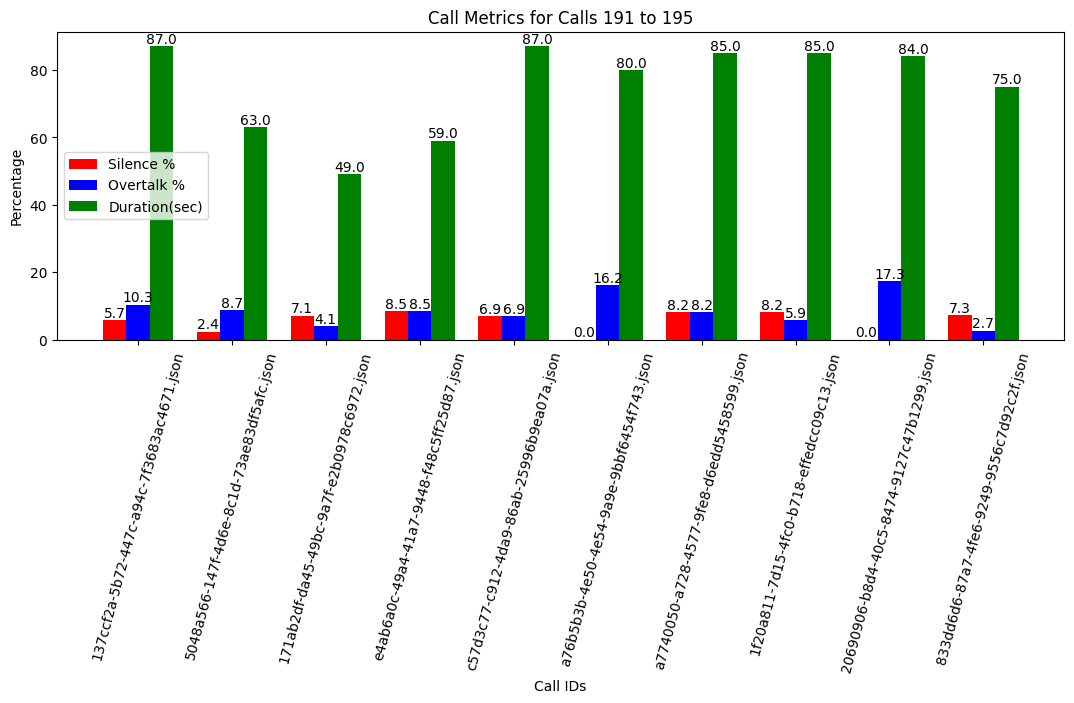

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


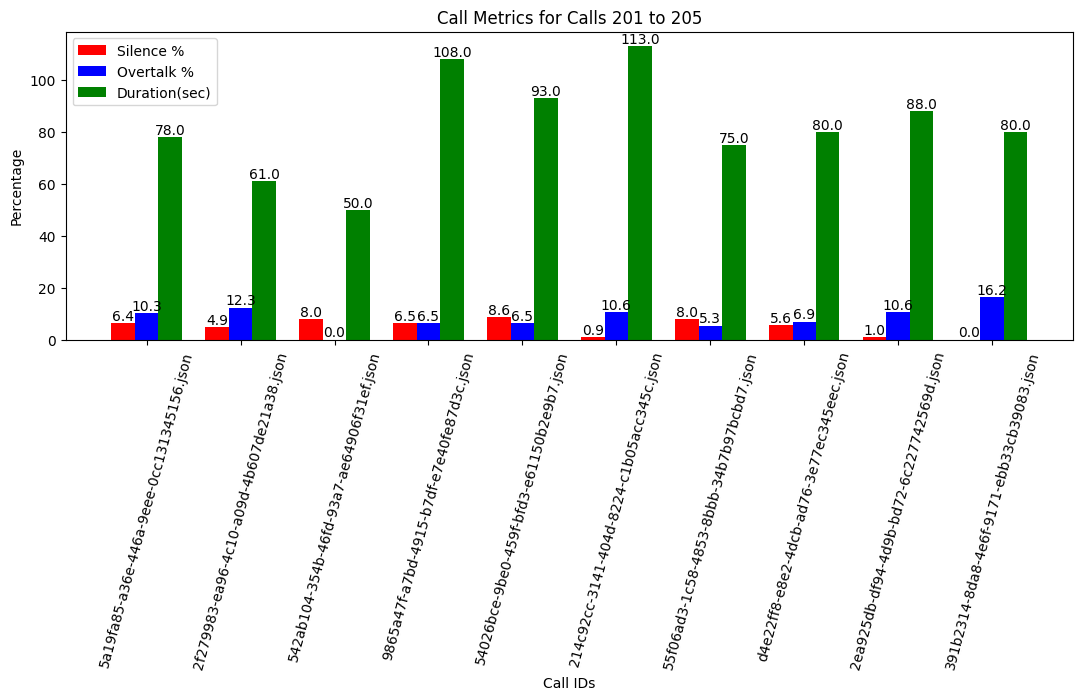

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


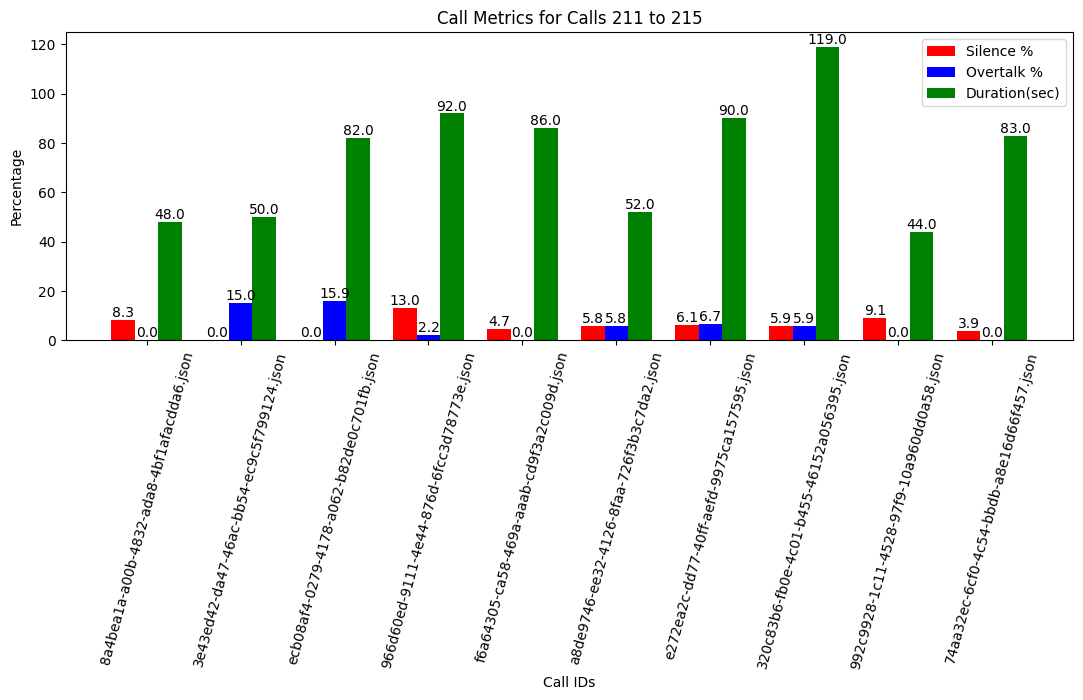

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


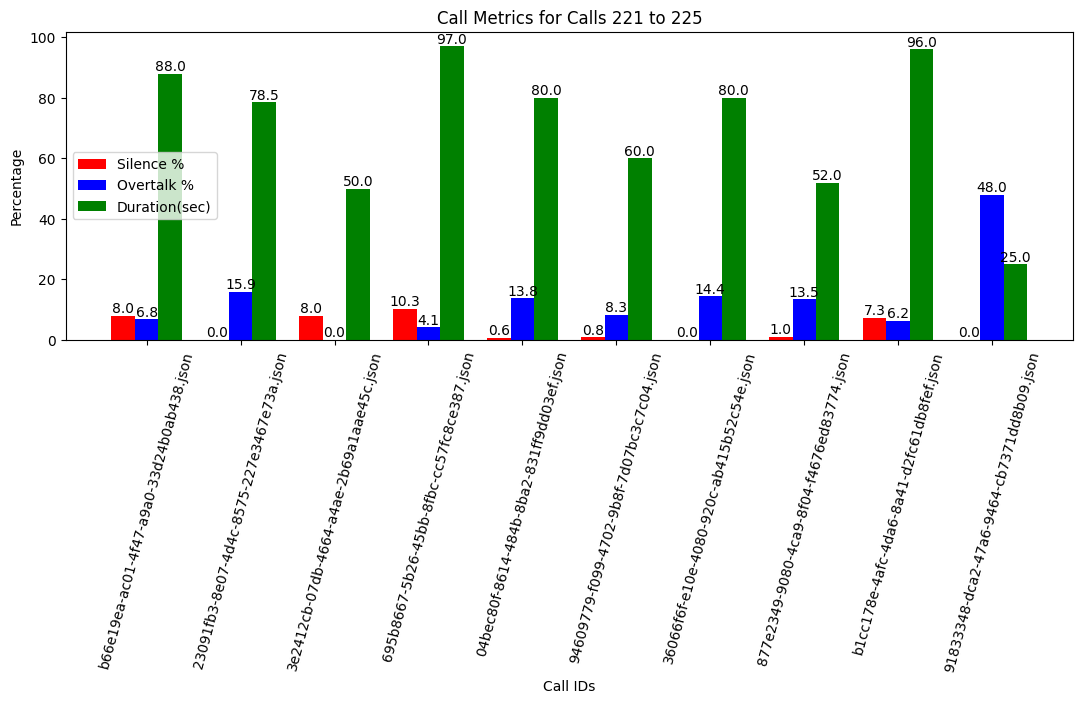

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


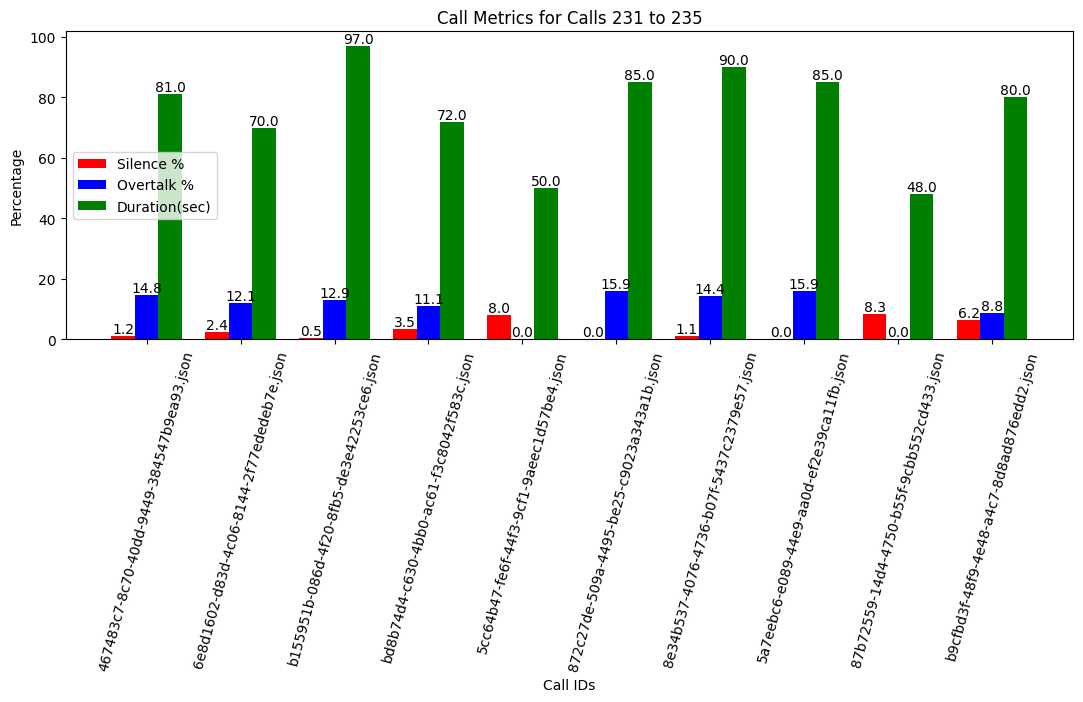

/var/folders/s9/ldwydvd94gn19smpv81r8x2r0000gn/T/ipykernel_23656/1128820663.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


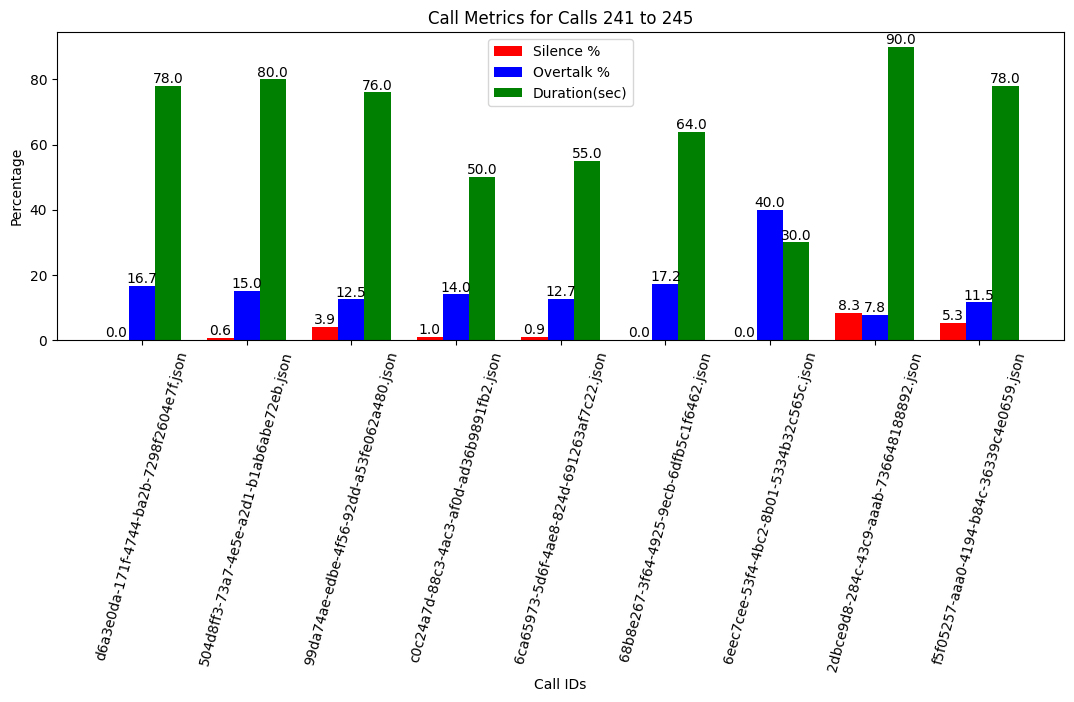

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
call_ids = [metrics['call_id'] for metrics in call_metrics]
silence_percentages = [metrics['silence_percentage'] for metrics in call_metrics]
overtalk_percentages = [metrics['overtalk_percentage'] for metrics in call_metrics]
total_call_duration = [metrics['total_call_duration'] for metrics in call_metrics]

# Loop over data in chunks of 5 call IDs
for i in range(0, len(call_ids), 10):
    # chunk of 5 calls
    chunk_call_ids = call_ids[i:i+10]
    chunk_silence_percentages = silence_percentages[i:i+10]
    chunk_overtalk_percentages = overtalk_percentages[i:i+10]
    chunk_total_call_duration = total_call_duration[i:i+10]

    # Create a new figure for each chunk
    plt.figure(figsize=(13, 4))

    # Bar chart
    x = np.arange(len(chunk_call_ids))  # Call ID indices for the chunk
    width = 0.25  # Width of the bars

    # grouped bars
    silence_bars = plt.bar(x - width, chunk_silence_percentages, width, label='Silence %', color='red')
    overtalk_bars = plt.bar(x, chunk_overtalk_percentages, width, label='Overtalk %', color='blue')
    duration_bars = plt.bar(x + width, chunk_total_call_duration, width, label='Duration(sec)', color='green')
    # adding annotations
    def add_annotations(bars):
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,f'{height:.1f}', ha='center', va='bottom')
    
    add_annotations(silence_bars)
    add_annotations(overtalk_bars)
    add_annotations(duration_bars)
    
    # labels and title
    plt.xlabel('Call IDs')
    plt.ylabel('Percentage')
    plt.title(f'Call Metrics for Calls {i+1} to {i+5}')
    plt.xticks(x, chunk_call_ids, rotation=75)  # Set x-ticks to the call IDs and rotate for readability

    # Adding a legend
    plt.legend(prop={'size': 10}, loc='best')
    plt.tight_layout()
    plt.show()